<a href="https://colab.research.google.com/github/janedataio/generative-ai-for-beginners/blob/main/astar_euclidean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

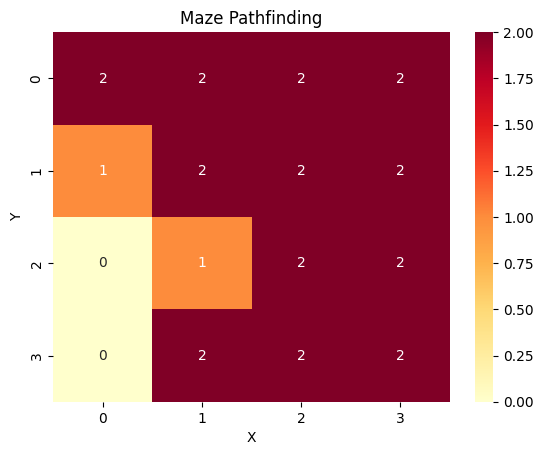

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from collections import deque

def euclidean_distance(node, goal):
    return np.sqrt((node[0] - goal[0])**2 + (node[1] - goal[1])**2)

def a_star(maze, start, goal):
    open_set = deque([(start, 0, 0)])
    closed_set = set()
    path = []

    while open_set:
        current, g_cost, f_cost = open_set.popleft()

        if current == goal:
            path.append(current)
            break

        closed_set.add(current)

        for neighbor in [(current[0] - 1, current[1]), (current[0] + 1, current[1]),
                         (current[0], current[1] - 1), (current[0], current[1] + 1)]:
            if neighbor in closed_set or neighbor[0] < 0 or neighbor[1] < 0 or neighbor[0] >= len(maze) or neighbor[1] >= len(maze[0]) or maze[neighbor[0]][neighbor[1]] == 1:
                continue

            h_cost = euclidean_distance(neighbor, goal)
            new_g_cost = g_cost + 1
            new_f_cost = new_g_cost + h_cost

            if neighbor not in open_set:
                open_set.append((neighbor, new_g_cost, new_f_cost))
            elif neighbor in open_set and new_f_cost < f_cost:
                open_set.remove((neighbor, g_cost, f_cost))
                open_set.append((neighbor, new_g_cost, new_f_cost))

        path.append(current)

    return path

def visualize_maze(maze, path):
    maze_copy = maze.copy()

    for node in path:
        maze_copy[node[0]][node[1]] = 2

    heatmap(maze_copy, annot=True, fmt="d", cmap="YlOrRd")
    plt.title("Maze Pathfinding")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

if __name__ == "__main__":
    maze = np.array([
        [0, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 3]
    ])

    start = (0, 0)
    goal = (3, 3)

    path = a_star(maze, start, goal)
    visualize_maze(maze, path)
